<a href="https://colab.research.google.com/github/randallscott25/IST718Lab3/blob/master/Taylor_Lab_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Randall Scott Taylor
#Big Data 718 Summer 2020
# Laboratory Exercise 1 
# "What is the recommended salary for our next head football coach?"
# A Case Study


The objective of this case study is to: 
combine dataset(s) to produce meaningful analysis.
Provide insights, understanding, and wisdom. 


1) Obtain data: understand its data structures and elements


2) Scrub Data using scripting methods


3) Explore the data, using essential qualitative analysis techniques


4)Model relationships between data using the appropriate analytical methodologies matched to the information and the needs of clients and users. 


5) Interpret the data, model, analysis, and findings, and communicate the results in a meaningful way. 







Instructions
•	The research question is, how can we recommend the best salary (total compensation, minus bonus) for our next head football coach?

#	Start with the data Coaches.
#	Review the data-- clean as appropriate
#	Consider the base worksheet and the additional data.
#	Stadium size
#	Graduation rate:
#	Available from: NCAA Graduation Rates
#	Use the 2006 or latest cohort and include both GSR and FGR
#	Annual donations to program (if available)
#	Develop an additional vector for each school using last year's record.
#	Build a data frame for your analysis.
#	Conduct an initial data analysis.
#	Fit a regression model with the salary as the response and the relevant predictors (more than one is needed...)





# Step 1 

import packages for analysis and modeling

In [161]:
# Download the csv file from class github
!pip install ipyleaflet
!jupyter nbextension enable --py --sys-prefix ipyleaflet
!pip install chart_studio
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install -q xlrd
!pip install geopandas
!apt install proj-bin libproj-dev libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
!pip install -U git+https://github.com/matplotlib/basemap.git
!git clone https://github.com/2SUBDA/IST_718
#import packages for analysis and modeling
import pandas as pd # dataframe operations
import numpy as np # arrays and math functions
from scipy.stats import uniform # for training and test split
import statsmodels.api as sm # statistical models (regression)
import statsmodels.formula.api as smf # for R likened specifications
import matplotlib.pyplot as plt # 2D plotting
import seaborn as sns #provides trellis, small multiple plotting
from scipy import stats
from statsmodels.formula.api import ols
import scipy.stats as stats 
from sklearn import linear_model
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import decimal
from fuzzywuzzy import fuzz
from fuzzywuzzy import process 
from string import ascii_letters
import chart_studio.plotly as py
import plotly.graph_objs as go4
#geospatial analysis 
from sklearn.preprocessing import StandardScaler 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap 
from geopandas import GeoDataFrame
from shapely.geometry import Point
from ipyleaflet import *
from ipyleaflet import Map, GeoData, basemaps, LayersControl
import geopandas

%matplotlib inline  




Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbextension", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 988, in start
    super(NBExtensionApp, self).start()
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 256, in start
    self.subapp.start()
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 896, in start
    self.toggle_nbextension_python(self.extra_args[0])
  File "/usr/local/lib/python2.7/dist-packages/notebook/nbextensions.py", line 872, in toggle_nbextension_python
    logger=self.log)
  File "/usr/local/lib/python2.7/dist-pac

fatal: destination path 'IST_718' already exists and is not an empty directory.


In [162]:


#!pip install ipyleaflet

#!jupyter nbextension enable --py --sys-prefix ipyleaflet

In [163]:
#set global teams list for the answering of specific questions
b_e_conf_2012 = ['Cincinnati', 'Connecticut', 'Pittsburgh', 'Rutgers', 'South Florida','Syracuse','Louisville']
b_10_conf = ['Syracuse','Illinois', 'Minnesota','Northwestern','Purdue', 'Wisconsin','Michigan','Indiana','Iowa','Ohio State','Michigan State','Penn State', 'Nebraska','Maryland','Rutgers']
syracuse_conf = 'ACC'
d = decimal.Decimal
df = pd.read_csv('IST_718/Coaches9.csv', na_values="--")
print(df)
#creating a new dataframe to disallow not null values 

df_new = df[df['TotalPay'].notnull()]
df_new.dtypes

#df_new.to_csv(index=False)
#df_new.to_csv (r'C:\Users\randa\Desktop\export_dataframe.csv', index = False, header=True)
#df_new.to_csv(r'C:\Users\randa\OneDrive\Syracuse University Masters of Applied Data Science\IST 718 Big Data\newdf.csv', index = False)

                    School Conference  ... AssistantPay        Buyout
0                Air Force   Mt. West  ...          $0            NaN
1                    Akron        MAC  ...          $0      $688,500 
2                  Alabama        SEC  ...          $0   $33,600,000 
3    Alabama at Birmingham      C-USA  ...          $0    $3,847,500 
4        Appalachian State   Sun Belt  ...          $0    $2,160,417 
..                     ...        ...  ...          ...           ...
124          West Virginia     Big 12  ...          $0    $7,150,000 
125       Western Kentucky      C-USA  ...          $0    $1,200,000 
126       Western Michigan        MAC  ...          $0      $800,000 
127              Wisconsin    Big Ten  ...          $0    $6,000,000 
128                Wyoming   Mt. West  ...          $0    $8,016,667 

[129 rows x 9 columns]


School          object
Conference      object
Coach           object
SchoolPay       object
TotalPay        object
Bonus           object
BonusPaid       object
AssistantPay    object
Buyout          object
dtype: object

In [164]:
#giving visual check of the newly created df 
df_new.to_csv (r'export_dataframe.csv', index = False, header=True)

In the ETL process, the researcher found it prudent to create a new dataframe based upon running the .notnull() function against the original dataframe. 
another aspect to point out, the datatypes of the columns will needs be addressed in order to model. 

In [165]:
#establish a variable of colums to drop 
drop = ['SchoolPay','Bonus','AssistantPay','Buyout']
df_new.drop(columns=drop, inplace=True, axis=0)
df_new.dtypes

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



School        object
Conference    object
Coach         object
TotalPay      object
BonusPaid     object
dtype: object

OSEMN 
We have obtained the data. Now we will need to scrub the data to make it workable. After having removing the columns that the researcher felt was not needed information to effect a model that explains that varatiblity in all factors, we will need to address the data contained in TotalPay and BonusPay
the data is not uniform
we have $ signs that need to be removed
we have' , ' that need to be removed 
The below code will do this. 


In [166]:
#Let us clean up the data, replace spacing form and $ 
df_new['TotalPay'] = df_new['TotalPay'].str.replace(r"$","")
df_new['TotalPay'] = df_new['TotalPay'].str.replace(r",","")
df_new['BonusPaid'] = df_new['BonusPaid'].str.replace(r"$","")
df_new['BonusPaid'] = df_new['BonusPaid'].str.replace(r",","")
df_new['BonusPaid'].fillna('0', inplace = True)
print(df_new)

                    School Conference              Coach  TotalPay BonusPaid
0                Air Force   Mt. West       Troy Calhoun    885000         0
1                    Akron        MAC       Terry Bowden   412500     50000 
2                  Alabama        SEC         Nick Saban  8307000    500000 
3    Alabama at Birmingham      C-USA         Bill Clark   900000    165471 
4        Appalachian State   Sun Belt  Scott Satterfield   712500    145000 
..                     ...        ...                ...       ...       ...
124          West Virginia     Big 12     Dana Holgorsen  3617500     90000 
125       Western Kentucky      C-USA   Mike Sanford Jr.   805850         0 
126       Western Michigan        MAC         Tim Lester   800000     39250 
127              Wisconsin    Big Ten        Paul Chryst  3750000    290000 
128                Wyoming   Mt. West         Craig Bohl  1412000    236000 

[125 rows x 5 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [167]:
# continuing with the transformation and loading, change datatypes from object to numeric
df_new['TotalPay'] = pd.to_numeric(df_new['TotalPay'])
df_new['BonusPaid'] = pd.to_numeric(df_new['BonusPaid'])
df_new.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



School        object
Conference    object
Coach         object
TotalPay       int64
BonusPaid      int64
dtype: object

# SCRUB (Transformation) continued
Now that the data that we want to address, that being pay, is in a data type that we can mathematically address, lets us combine the 'Total Pay', and 'Bonus Pay' into one category, combinedPay.


In [168]:
#make a copy of the above dataframe
coachesdf = df_new
#combine that data in totalpay and bonuspay
coachesdf['combinedPay'] = coachesdf['TotalPay'] + coachesdf['BonusPaid']
coachesdf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,School,Conference,Coach,TotalPay,BonusPaid,combinedPay
0,Air Force,Mt. West,Troy Calhoun,885000,0,885000
1,Akron,MAC,Terry Bowden,412500,50000,462500
2,Alabama,SEC,Nick Saban,8307000,500000,8807000
3,Alabama at Birmingham,C-USA,Bill Clark,900000,165471,1065471
4,Appalachian State,Sun Belt,Scott Satterfield,712500,145000,857500


#EXPLORE 
The dataset has had some initial scrubing, we have now a single category of pay, combinedPay, to work with; now it is time to start to explore this initial data. 
The next section will setup a pivot table to show the average salary per conference. 
A couple of notes of configuration: 
> setup panadas to not show the mean in scientific notation

>the pivot table will show average salary per conference



In [169]:
#setting up Pandas to not show mean in scientific notation
pd.options.display.float_format = '{:.0f}'.format
#create pivot table for average salary per conference
pivot = pd.pivot_table(coachesdf, values='combinedPay', columns='Conference', aggfunc='mean', fill_value= None, margins=False, dropna=True, margins_name='All')
print(pivot)
pivot2=pd.DataFrame.transpose(pivot)
print(pivot2)

Conference      AAC     ACC  Big 12  ...  Pac-12     SEC  Sun Belt
combinedPay 1696668 3581648 4143978  ... 2975633 4864884    686150

[1 rows x 11 columns]
            combinedPay
Conference             
AAC             1696668
ACC             3581648
Big 12          4143978
Big Ten         4453657
C-USA            880323
Ind.             993816
MAC              628415
Mt. West        1158521
Pac-12          2975633
SEC             4864884
Sun Belt         686150


Text(0, 0.5, 'Average Combine Pay Ranks')

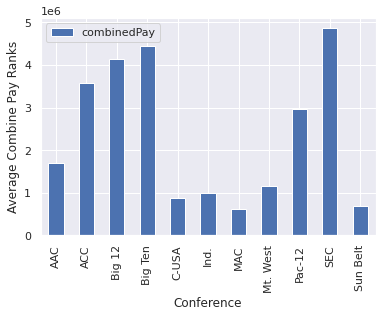

In [170]:
#Visualization of the pivot2 data 
sns.set()
pivot2.plot(kind='bar')
plt.ylabel('Average Combine Pay Ranks')

# Further Descriptive Statistics to describe the Conferences Pay 



In [171]:
pivot3 = pd.pivot_table(coachesdf, values='combinedPay', index='Conference', aggfunc=[np.mean, np.median, min, max, np.std], fill_value= None, margins=False, dropna=True, margins_name='All')
print(pivot3)
#pivot4=pd.DataFrame.transpose(pivot3)
#print(pivot4)

                  mean      median         min         max         std
           combinedPay combinedPay combinedPay combinedPay combinedPay
Conference                                                            
AAC            1696668     1664500     1070000     2785000      527071
ACC            3581648     3280009     1831580     7043350     1363522
Big 12         4143978     4150000     1701109     5575000     1159692
Big Ten        4453657     4277708     1830000     7950000     1790482
C-USA           880323      817570      515000     1555000      274680
Ind.            993816      932521      439640     2129638      675949
MAC             628415      527986      440000     1335000      255150
Mt. West       1158521      925000      486504     2790000      711269
Pac-12         2975633     2900732     1575000     4677500     1033425
SEC            4864884     4073000     2600000     8807000     2164557
Sun Belt        686150      675000      390000      910000      182955


# Next Data Set
# Importing Stadium Sizes 

In order to collect this data the student is going to need to webscrape the following:


https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums


CHANGE: Sourcing code from the following

https://raw.githubusercontent.com/gboeing/data-visualization/master/ncaa-football-stadiums/data/stadiums-geocoded.csv

The below procedure from 

In [172]:
#table = pd.read_html('https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums', header=0, flavor='bs4') [0]
#table.dtypes
#print(table)
#table.to_csv('stadium_sizes.csv')

In [173]:
#stad_df = table[['Stadium','Team','City','State','Conference','Capacity']]
#print(stad_df)
#stad_df.to_csv('stad_df.csv')

#stad_df.iloc[0]



In [174]:
#stad_df.head()
#stad_df

In [175]:
# pull in geo coded dataset, union they two datasets
stad_df =pd.read_csv('https://raw.githubusercontent.com/gboeing/data-visualization/master/ncaa-football-stadiums/data/stadiums-geocoded.csv', error_bad_lines=False)
stad_df.head()
stad_df.to_csv('stad_df.csv')

stad_df

,stadium,city,state,team,conference,capacity,built,expanded,div,latitude,longitude
0,Michigan Stadium,Ann Arbor,MI,Michigan,Big Ten,107601,1927,2015,fbs,42,-84
1,Beaver Stadium,University Park,PA,Penn State,Big Ten,106572,1960,2001,fbs,41,-78
2,Ohio Stadium,Columbus,OH,Ohio State,Big Ten,104944,1922,2014,fbs,40,-83
3,Kyle Field,College Station,TX,Texas A&M,SEC,102733,1927,2015,fbs,31,-96
4,Neyland Stadium,Knoxville,TN,Tennessee,SEC,102455,1921,2010,fbs,36,-84
...,...,...,...,...,...,...,...,...,...,...,...
248,DeGol Field,Loretto,Pennsylvania,Saint Francis Red Flash,Northeast,3500,2006,NaN,fcs,41,-79
249,Wagner College Stadium,Staten Island,New York,Wagner Seahawks,Northeast,3300,1967,NaN,fcs,41,-74
250,Joe Walton Stadium,Moon Township,Pennsylvania,Robert Morris Colonials,Northeast,3000,2005,NaN,fcs,41,-80
251,Cooper Field,Georgetown,Washington D.C.,Georgetown Hoyas,Patriot,2500,2005,NaN,fcs,39,-77


In [176]:
stad_df.columns = ['Stadium', 'City', 'State', 'Team','Conference',
              'Capacity','Built','Expanded', 'Div', 'Latitude', 'Longitude']
stad_df.head()
stad_df.to_csv('stad_df.csv')

In [177]:
stad_df

,Stadium,City,State,Team,Conference,Capacity,Built,Expanded,Div,Latitude,Longitude
0,Michigan Stadium,Ann Arbor,MI,Michigan,Big Ten,107601,1927,2015,fbs,42,-84
1,Beaver Stadium,University Park,PA,Penn State,Big Ten,106572,1960,2001,fbs,41,-78
2,Ohio Stadium,Columbus,OH,Ohio State,Big Ten,104944,1922,2014,fbs,40,-83
3,Kyle Field,College Station,TX,Texas A&M,SEC,102733,1927,2015,fbs,31,-96
4,Neyland Stadium,Knoxville,TN,Tennessee,SEC,102455,1921,2010,fbs,36,-84
...,...,...,...,...,...,...,...,...,...,...,...
248,DeGol Field,Loretto,Pennsylvania,Saint Francis Red Flash,Northeast,3500,2006,NaN,fcs,41,-79
249,Wagner College Stadium,Staten Island,New York,Wagner Seahawks,Northeast,3300,1967,NaN,fcs,41,-74
250,Joe Walton Stadium,Moon Township,Pennsylvania,Robert Morris Colonials,Northeast,3000,2005,NaN,fcs,41,-80
251,Cooper Field,Georgetown,Washington D.C.,Georgetown Hoyas,Patriot,2500,2005,NaN,fcs,39,-77


# Cleaning the stadium dataset
The dataset in the capacity columns has references to that data, we will need to remove those citations 


In [178]:
#GREAT CODE AS IT RELATES TO WIKIPEDIA WEBSCRAPE KEEEP 
#
#remove the citations within the data 
#stad_df['Capacity'] = stad_df['Capacity'].str.replace(r'\[.*\]','')
#stad_df['Capacity'] = stad_df['Capacity'].str.replace(r',','')

#print(stad_df)


# Change the data type of capacity from object to numeric 

In [179]:

stad_df['Capacity']= pd.to_numeric(stad_df['Capacity'])

In [180]:
stad_df.dtypes

Stadium        object
City           object
State          object
Team           object
Conference     object
Capacity        int64
Built           int64
Expanded       object
Div            object
Latitude      float64
Longitude     float64
dtype: object

# The next datasets are a culmination of looking via the web. 

>GSR data set from NCAA 2006 - 2007 selected
cleaned up data in excel, saved to CSV

>Footballl revenue was obtained from https://ope.ed.gov/athletics/#/customdata/datafiltered
= 2006 

> team record from 2006 cleaned up and saved to csv





In [181]:
!git clone https://github.com/randallscott25/IST718Lab3
gsrurl = 'IST718Lab3/GSR.csv'
gsr_df = pd.read_csv(gsrurl, sep=',')
#gsr_df.to_csv('gradsuccessrate.csv')

fatal: destination path 'IST718Lab3' already exists and is not an empty directory.


In [182]:
#Football Revenue obtained from https://ope.ed.gov/athletics/#/customdata/datafiltered = 2006 
FootballRevenueURL = 'IST718Lab3/FootballRevenue.csv'
FootballRevenue = pd.read_csv(FootballRevenueURL, sep=',')
FootballRevenue_df = FootballRevenue

#FootballRevenue_df.to_csv('FootballRevenue.csv')

In [183]:
#team record data from google search 
recordurl = "IST718Lab3/Record.csv"
record_df = pd.read_csv(recordurl, sep=',')
record_df.to_csv('Record.csv')

#Combine all of these datasets into a workable dataset

> The researcher needs to combine these datasets into one. 

In [184]:
#school names cleanup 
NameCleanup = "IST718Lab3/NameCleanup.csv"
NameCleanup_df = pd.read_csv(NameCleanup, sep=',')
NameCleanup_df.to_csv('Names.csv')


In [185]:
print(list(stad_df))
print(list(NameCleanup_df))

['Stadium', 'City', 'State', 'Team', 'Conference', 'Capacity', 'Built', 'Expanded', 'Div', 'Latitude', 'Longitude']
['CurrentName', 'ShouldBe']


In [186]:
clean_stad_df = pd.merge(left=stad_df, right=NameCleanup_df, how = 'left',
                  left_on='Team', right_on='CurrentName')
clean_stad_df['SchoolNameFinal'] = clean_stad_df['ShouldBe'].fillna(clean_stad_df['Team'])

print(clean_stad_df)


                             Stadium  ...          SchoolNameFinal
0                   Michigan Stadium  ...                 Michigan
1                     Beaver Stadium  ...               Penn State
2                       Ohio Stadium  ...               Ohio State
3                         Kyle Field  ...                Texas A&M
4                    Neyland Stadium  ...                Tennessee
..                               ...  ...                      ...
248                      DeGol Field  ...  Saint Francis Red Flash
249           Wagner College Stadium  ...          Wagner Seahawks
250               Joe Walton Stadium  ...  Robert Morris Colonials
251                     Cooper Field  ...         Georgetown Hoyas
252  Arthur J. Rooney Athletic Field  ...           Duquesne Dukes

[253 rows x 14 columns]


# Second Data Frame clean up 
coachesdf to NamesCleanup 


In [187]:
print(list(coachesdf))
print(list(NameCleanup_df))
cleancoachesdf = pd.merge(left=coachesdf, right = NameCleanup_df, how='left', left_on='School', right_on='CurrentName')
cleancoachesdf['SchoolNameFinal']=cleancoachesdf['ShouldBe'].fillna(cleancoachesdf['School'])
cleancoachesdf

['School', 'Conference', 'Coach', 'TotalPay', 'BonusPaid', 'combinedPay']
['CurrentName', 'ShouldBe']


,School,Conference,Coach,TotalPay,BonusPaid,combinedPay,CurrentName,ShouldBe,SchoolNameFinal
0,Air Force,Mt. West,Troy Calhoun,885000,0,885000,NaN,NaN,Air Force
1,Akron,MAC,Terry Bowden,412500,50000,462500,NaN,NaN,Akron
2,Alabama,SEC,Nick Saban,8307000,500000,8807000,NaN,NaN,Alabama
3,Alabama at Birmingham,C-USA,Bill Clark,900000,165471,1065471,Alabama at Birmingham,UAB,UAB
4,Appalachian State,Sun Belt,Scott Satterfield,712500,145000,857500,NaN,NaN,Appalachian State
...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,3617500,90000,3707500,NaN,NaN,West Virginia
121,Western Kentucky,C-USA,Mike Sanford Jr.,805850,0,805850,NaN,NaN,Western Kentucky
122,Western Michigan,MAC,Tim Lester,800000,39250,839250,NaN,NaN,Western Michigan
123,Wisconsin,Big Ten,Paul Chryst,3750000,290000,4040000,NaN,NaN,Wisconsin


# Third Data frame cleanup 


In [188]:
print(list(record_df))
print(list(NameCleanup_df))
cleanrecorddf = pd.merge(left=record_df, right = NameCleanup_df, how='left', left_on='School', right_on='CurrentName')
cleanrecorddf['SchoolNameFinal']=cleanrecorddf['ShouldBe'].fillna(cleanrecorddf['School'])
cleanrecorddf

['School', 'Conference', 'Division', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss']
['CurrentName', 'ShouldBe']


,School,Conference,Division,ConfWins,ConfLoss,OverallWins,OverallLoss,HomeWins,HomeLoss,AwayWins,AwayLoss,CurrentName,ShouldBe,SchoolNameFinal
0,Wake Forest,ACC,ACC Atlantic Division,6,2,11,3,4,3,7,1,NaN,NaN,Wake Forest
1,Boston College,ACC,ACC Atlantic Division,5,3,10,3,8,1,2,3,NaN,NaN,Boston College
2,Maryland,ACC,ACC Atlantic Division,5,3,9,4,7,1,2,3,NaN,NaN,Maryland
3,Clemson,ACC,ACC Atlantic Division,5,3,8,5,5,2,3,3,NaN,NaN,Clemson
4,Florida State,ACC,ACC Atlantic Division,3,5,7,6,4,4,3,2,NaN,NaN,Florida State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Indiana,NaN,Big 10 Conference,3,5,5,7,3,4,2,3,NaN,NaN,Indiana
112,Iowa,NaN,Big 10 Conference,2,6,6,7,4,4,2,3,NaN,NaN,Iowa
113,Northwestern,NaN,Big 10 Conference,2,6,4,8,2,4,2,4,NaN,NaN,Northwestern
114,MI State,NaN,Big 10 Conference,1,7,4,8,2,5,2,3,MI State,Michigan State,Michigan State


In [189]:
gsr_df

,Cohort Year,School,Conference,Sport,State,GSR,FGR
0,2006,University of Akron,Mid-American Conference,Football,OH,58,52
1,2006,Alabama A&M University,Southwestern Athletic Conf.,Football,AL,40,45
2,2006,Alabama State University,Southwestern Athletic Conf.,Football,AL,81,59
3,2006,University of Alabama,Southeastern Conference,Football,AL,73,57
4,2006,University of Alabama at Birmingham,Conference USA,Football,AL,60,55
...,...,...,...,...,...,...,...
237,2006,Elon University,Southern Conference,Football,NC,80,69
238,2006,Gardner-Webb University,Big South Conference,Football,NC,79,65
239,2006,Presbyterian College,Big South Conference,Football,SC,83,65
240,2006,"University of Arkansas, Pine Bluff",Southwestern Athletic Conf.,Football,AR,47,37


In [190]:
gsr_df['SchoolName']=gsr_df['School']
#Specific Corrections--some of these were generated after looking at working df output below...
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"Texas A&M University, College Station","Texas A&M")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University at Buffalo, the State University of New York","Buffalo")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"-Madison","")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"U.S. Naval Academy","Navy")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"U.S. Air Force Academy","Air Force")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"U.S. Military Academy","Army")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"U.S. Military Academy","Purdue")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"Indiana University, Bloomington","Indiana")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Alabama at Birmingham","UAB")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Hawaii, Manoa","Hawaii")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Arkansas, Fayetteville","Arkansas")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"Bowling Green State University","Bowling Green")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of California, Berkeley","California")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Colorado, Boulder","Colorado")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"California State University, Fresno","Fresno State")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"Georgia Institute of Technology","Georgia Tech")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Illinois Urbana-Champaign","Illinois")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Louisiana at Monroe","Louisiana-Monroe")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Louisiana at Lafayette","Louisiana-Lafayette")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"Louisiana State University","LSU")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Maryland, College Park","Maryland")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Massachusetts, Amherst","Massachusetts")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Miami (Florida)","Miami FL")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"Middle Tennessee State University","Middle Tennessee")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Minnesota, Twin Cities","Minnesota")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Nebraska, Lincoln","Nebraska")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Nevada, Las Vegas","Nevada-Las Vegas")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Nevada, Reno","Nevada")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"North Carolina State University","North Carolina State")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"The Ohio State University","Ohio State")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"Pennsylvania State University","Penn State")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"Rutgers, The State University of New Jersey, New Brunswick","Rutgers")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of South Carolina, Columbia","South Carolina")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"The University of Southern Mississippi","Southern Mississippi")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Tennessee, Knoxville","Tennessee")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Texas at Austin","Texas")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of Texas at El Paso","Texas-El Paso")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"The University of Tulsa","Tulsa")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of California, Los Angeles","UCLA")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"Virginia Polytechnic Institute and State University","Virginia Tech")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University of North Carolina, Chapel Hill","North Carolina")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"Missouri State University","Missouri")

#general corrections
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r" University","")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"University ","")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"College ","")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r" College","")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"of ","")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r" of","")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"at ","")
gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r" at","")

gsr_df['SchoolName'] = gsr_df['SchoolName'].str.replace(r"Boston","Boston College")

gsr_df

,Cohort Year,School,Conference,Sport,State,GSR,FGR,SchoolName
0,2006,University of Akron,Mid-American Conference,Football,OH,58,52,Akron
1,2006,Alabama A&M University,Southwestern Athletic Conf.,Football,AL,40,45,Alabama A&M
2,2006,Alabama State University,Southwestern Athletic Conf.,Football,AL,81,59,Alabama State
3,2006,University of Alabama,Southeastern Conference,Football,AL,73,57,Alabama
4,2006,University of Alabama at Birmingham,Conference USA,Football,AL,60,55,UAB
...,...,...,...,...,...,...,...,...
237,2006,Elon University,Southern Conference,Football,NC,80,69,Elon
238,2006,Gardner-Webb University,Big South Conference,Football,NC,79,65,Gardner-Webb
239,2006,Presbyterian College,Big South Conference,Football,SC,83,65,Presbyterian
240,2006,"University of Arkansas, Pine Bluff",Southwestern Athletic Conf.,Football,AR,47,37,"Arkansas, Pine Bluff"


In [191]:
print(list(gsr_df))
print(list(NameCleanup_df))

clean_gsr_df = pd.merge(left=gsr_df, right=NameCleanup_df, how='left',
                        left_on= 'SchoolName', right_on='CurrentName')
clean_gsr_df['SchoolNameFinal']=clean_gsr_df['ShouldBe'].fillna(clean_gsr_df['SchoolName'])
clean_gsr_df.to_csv('clean_gsr_df.csv')
clean_gsr_df

['Cohort Year', 'School', 'Conference', 'Sport', 'State', 'GSR', 'FGR', 'SchoolName']
['CurrentName', 'ShouldBe']


,Cohort Year,School,Conference,Sport,State,GSR,FGR,SchoolName,CurrentName,ShouldBe,SchoolNameFinal
0,2006,University of Akron,Mid-American Conference,Football,OH,58,52,Akron,NaN,NaN,Akron
1,2006,Alabama A&M University,Southwestern Athletic Conf.,Football,AL,40,45,Alabama A&M,NaN,NaN,Alabama A&M
2,2006,Alabama State University,Southwestern Athletic Conf.,Football,AL,81,59,Alabama State,NaN,NaN,Alabama State
3,2006,University of Alabama,Southeastern Conference,Football,AL,73,57,Alabama,NaN,NaN,Alabama
4,2006,University of Alabama at Birmingham,Conference USA,Football,AL,60,55,UAB,NaN,NaN,UAB
...,...,...,...,...,...,...,...,...,...,...,...
237,2006,Elon University,Southern Conference,Football,NC,80,69,Elon,NaN,NaN,Elon
238,2006,Gardner-Webb University,Big South Conference,Football,NC,79,65,Gardner-Webb,NaN,NaN,Gardner-Webb
239,2006,Presbyterian College,Big South Conference,Football,SC,83,65,Presbyterian,NaN,NaN,Presbyterian
240,2006,"University of Arkansas, Pine Bluff",Southwestern Athletic Conf.,Football,AR,47,37,"Arkansas, Pine Bluff",NaN,NaN,"Arkansas, Pine Bluff"


In [192]:
FootballRevenue_df['SchoolName']=FootballRevenue_df['School']
#Specific Corrections--some of these were generated after looking at working df output below...
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Texas A&M University, College Station","Texas A&M")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"SUNY at Buffalo","Buffalo")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"-Madison","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"U.S. Naval Academy","Navy")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"U.S. Air Force Academy","Air Force")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"U.S. Military Academy","Army")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"U.S. Military Academy","Purdue")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Indiana University, Bloomington","Indiana")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Alabama at Birmingham","UAB")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Hawaii at Manoa","Hawaii")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Arkansas, Fayetteville","Arkansas")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Bowling Green State University","Bowling Green")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of California-Berkeley","California")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Colorado at Boulder","Colorado")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"California State University-Fresno","Fresno State")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Georgia Institute of Technology","Georgia Tech")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Illinois at Urbana-Champaign","Illinois")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Louisiana at Monroe","Louisiana-Monroe")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Louisiana at Lafayette","Louisiana-Lafayette")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Louisiana State University and Agricultural & Mechanical College","LSU")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Maryland, College Park","Maryland")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Massachusetts-Amherst","Massachusetts")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Miami (Florida)","Miami FL")

FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Middle Tennessee State University","Middle Tennessee")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Minnesota, Twin Cities","Minnesota")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Nebraska, Lincoln","Nebraska")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Nevada-Las Vegas","Nevada-Las Vegas")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Nevada-Reno","Nevada")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Ohio State University-Main Campus","Ohio State")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Pennsylvania State University-Main Campus","Penn State")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Rutgers University-New Brunswick/Piscataway","Rutgers")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of South Carolina-Columbia","South Carolina")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"The University of Southern Mississippi","Southern Mississippi")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Tennessee, Knoxville","Tennessee")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Texas at Austin","Texas")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Texas at El Paso","Texas-El Paso")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"The University of Tulsa","Tulsa")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of California, Los Angeles","UCLA")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Virginia Polytechnic Institute and State University","Virginia Tech")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of North Carolina at Chapel Hill","North Carolina")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Arizona State University at the Tempe Campus","Arizona State")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Missouri State University","Missouri")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Arkansas State University-Main Campus","Arkansas State")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Bowling Green State University-Main Campus","Bowling Green")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Indiana University-Bloomington","Indiana")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Kent State University-Kent Campus","Kent State")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Michigan-Ann Arbor","Michigan")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Minnesota-Twin Cities","Minnesota")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Nebraska at Lincoln","Nebraska")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of New Mexico-Main Campus","New Mexico")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"New Mexico State University-Main Campus","New Mexico State")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"North Carolina State University at Raleigh","North Carolina State")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Ohio University-Main Campus","Ohio")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Oklahoma State University-Main Campus","Oklahoma State")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Oklahoma Norman Campus","Oklahoma")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Pittsburgh-Main Campus","Pittsburgh")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Purdue University-Main Campus","Purdue")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Texas A & M University","Texas A&M")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Texas State University-San Marcos","Texas State")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"The University of Texas at Austin","Texas")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Toledo-Main Campus","Toledo")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Tulane University of Louisiana","Tulane")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of California-Los Angeles","UCLA")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Virginia-Main Campus","Virginia")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University of Washington-Seattle Campus","Washington")



#general corrections
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r" University","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"University ","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"College ","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r" Main Campus","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Main Campus ","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"-Main Campus","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r" College","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"of ","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r" of","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"at ","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r" at","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r" The","")
FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"The ","")

FootballRevenue_df['SchoolName'] = FootballRevenue_df['SchoolName'].str.replace(r"Boston","Boston College")
FootballRevenue_df.to_csv('FootballRevenuedf.csv')

clean_FootballRevenue_df = FootballRevenue_df

In [193]:
print(list(clean_FootballRevenue_df))
print(list(NameCleanup_df))
clean_FootballRevenue_df = pd.merge(left=clean_FootballRevenue_df, right = NameCleanup_df, how='left', left_on='SchoolName', right_on='CurrentName')
clean_FootballRevenue_df['SchoolNameFinal'] = clean_FootballRevenue_df['ShouldBe'].fillna(clean_FootballRevenue_df['SchoolName'])

['Survey Year', 'School', 'Classification', 'TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue', 'SchoolName']
['CurrentName', 'ShouldBe']


In [194]:
clean_FootballRevenue_df

,Survey Year,School,Classification,TotalUndergrads,FootballRevenue,TotalSportsRevenue,SchoolName,CurrentName,ShouldBe,SchoolNameFinal
0,2006,Drake University,NCAA Division I-AA,3013,200030,11407671,Drake,NaN,NaN,Drake
1,2006,Central Connecticut State University,NCAA Division I-AA,7463,218089,8663684,Central Connecticut State,NaN,NaN,Central Connecticut State
2,2006,Georgetown University,NCAA Division I-AA,6358,235676,27358934,Georgetown,NaN,NaN,Georgetown
3,2006,Tennessee Technological University,NCAA Division I-AA,7569,261379,7542889,Tennessee Technological,NaN,NaN,Tennessee Technological
4,2006,Elon University,NCAA Division I-AA,4849,290421,11444438,Elon,NaN,NaN,Elon
...,...,...,...,...,...,...,...,...,...,...
228,2006,University of Florida,NCAA Division I-A,31742,58904976,107781004,Florida,NaN,NaN,Florida
229,2006,Ohio State University-Main Campus,NCAA Division I-A,34982,59142071,109382222,Ohio State,NaN,NaN,Ohio State
230,2006,University of Georgia,NCAA Division I-A,25437,59516939,75937460,Georgia,NaN,NaN,Georgia
231,2006,University of Notre Dame,NCAA Division I-A,8338,63675034,83586903,Notre Dame,NaN,NaN,Notre Dame


#Final Combinations of all datasets 

Having cleaned the data with the above regular expressions, below the researcher will demostrate the column values in each dataframe
will combine those values on 'SchoolNameFinal"

*troubleshooting note, I noticed that in the clean_stad_df I did not have a column of SchooNameFinal, debugging this took sometime. Great learning experience. 

In [195]:
print('clean_gsr_df', list(clean_gsr_df)) 
print('clean_FootballRevenue_df',list(clean_FootballRevenue_df))
print('cleanrecorddf',list(cleanrecorddf))
print('cleancoachesdf',list(cleancoachesdf))
print('clean_stad_df', list(clean_stad_df))

clean_gsr_df ['Cohort Year', 'School', 'Conference', 'Sport', 'State', 'GSR', 'FGR', 'SchoolName', 'CurrentName', 'ShouldBe', 'SchoolNameFinal']
clean_FootballRevenue_df ['Survey Year', 'School', 'Classification', 'TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue', 'SchoolName', 'CurrentName', 'ShouldBe', 'SchoolNameFinal']
cleanrecorddf ['School', 'Conference', 'Division', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss', 'CurrentName', 'ShouldBe', 'SchoolNameFinal']
cleancoachesdf ['School', 'Conference', 'Coach', 'TotalPay', 'BonusPaid', 'combinedPay', 'CurrentName', 'ShouldBe', 'SchoolNameFinal']
clean_stad_df ['Stadium', 'City', 'State', 'Team', 'Conference', 'Capacity', 'Built', 'Expanded', 'Div', 'Latitude', 'Longitude', 'CurrentName', 'ShouldBe', 'SchoolNameFinal']


In [196]:
workingDF = pd.merge(left=cleancoachesdf, right=clean_gsr_df, how='left', left_on='SchoolNameFinal',right_on='SchoolNameFinal')
workingDF = pd.merge(left=workingDF, right=clean_FootballRevenue_df, how='left', left_on='SchoolNameFinal',right_on='SchoolNameFinal')
workingDF = pd.merge(left=workingDF, right=cleanrecorddf, how='left', left_on='SchoolNameFinal',right_on='SchoolNameFinal')
workingDF = pd.merge(left=workingDF, right=clean_stad_df, how='left', left_on='SchoolNameFinal',right_on='SchoolNameFinal')
print('workingDF',list(workingDF))


workingDF ['School_x', 'Conference_x', 'Coach', 'TotalPay', 'BonusPaid', 'combinedPay', 'CurrentName_x', 'ShouldBe_x', 'SchoolNameFinal', 'Cohort Year', 'School_y', 'Conference_y', 'Sport', 'State_x', 'GSR', 'FGR', 'SchoolName_x', 'CurrentName_y', 'ShouldBe_y', 'Survey Year', 'School_x', 'Classification', 'TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue', 'SchoolName_y', 'CurrentName_x', 'ShouldBe_x', 'School_y', 'Conference_x', 'Division', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss', 'CurrentName_y', 'ShouldBe_y', 'Stadium', 'City', 'State_y', 'Team', 'Conference_y', 'Capacity', 'Built', 'Expanded', 'Div', 'Latitude', 'Longitude', 'CurrentName', 'ShouldBe']


#Final Combination 
#clean up / drop columns



In [197]:
workingDF=workingDF.drop(columns=['School_x','CurrentName_x', 'ShouldBe_x','Cohort Year','School_y', 'Conference_y', 'Sport', 'State_x','SchoolName_x', 'CurrentName_y', 'ShouldBe_y', 'Survey Year', 'School_x', 'Classification','SchoolName_y', 'CurrentName_x', 'ShouldBe_x', 'School_y','CurrentName_y', 'ShouldBe_y', 'State_y', 'Team', 'Conference_y','CurrentName', 'ShouldBe'])


In [198]:
workingDF.to_csv('workingDF.csv')
#workingDF=workingDF.drop(columns=['ShouldBe_x_x	','CurrentName_x_x','CurrentName_y_x'])

In [199]:
workingDF=workingDF[['SchoolNameFinal', 'Coach', 'Conference_x','Stadium','Division','TotalPay', 'BonusPaid', 'combinedPay','TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue' , 'GSR', 'FGR', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss', 'Capacity','Latitude','Longitude']]
workingDF.head()

,SchoolNameFinal,Coach,Conference_x,Conference_x,Stadium,Division,TotalPay,BonusPaid,combinedPay,TotalUndergrads,FootballRevenue,TotalSportsRevenue,GSR,FGR,ConfWins,ConfLoss,OverallWins,OverallLoss,HomeWins,HomeLoss,AwayWins,AwayLoss,Capacity,Latitude,Longitude
0,Air Force,Troy Calhoun,Mt. West,Mountain West,Falcon Stadium,Mountain West,885000,0,885000,nan,nan,nan,93,nan,3,5,4,8,2,4,2,4,46692,39,-105
1,Akron,Terry Bowden,MAC,Mid-American East,Summa Field at InfoCision Stadium,Mid-American East Division,412500,50000,462500,11824,1331447,17792195,58,52,3,5,5,7,4,1,1,6,30000,41,-82
2,Alabama,Nick Saban,SEC,SEC,Bryant–Denny Stadium,SEC Western Division,8307000,500000,8807000,17784,53182806,81946464,73,57,2,6,6,7,6,3,0,4,101821,33,-88
3,UAB,Bill Clark,C-USA,USA,NaN,USA East Division,900000,165471,1065471,10753,6348331,21600512,60,55,2,6,3,9,3,3,0,6,nan,nan,nan
4,Appalachian State,Scott Satterfield,Sun Belt,NaN,Kidd Brewer Stadium,NaN,712500,145000,857500,12442,4554223,9616056,68,56,nan,nan,nan,nan,nan,nan,nan,nan,24050,36,-82


In [200]:
#workingDF=workingDF[['SchoolNameFinal', 'Coach', 'Conference_x','Stadium','Division','TotalPay', 'BonusPaid', 'combinedPay','TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue' , 'GSR', 'FGR', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss', 'Capacity','Latitude','Longitude']]
cols=pd.Series(workingDF.columns)
#for dup in workingDF.columns.get_duplicates(): cols[workingDF.columns.get_loc(dup)]=[dup+'.'+str(d_idx) if d_idx!=0 else dup for d_idx in range(workingDF.columns.get_loc(dup).sum())]
workingDF.columns=cols



In [201]:
workingDF.dtypes
workingDF.to_csv('workingDF.csv')

In [202]:
print(workingDF.dtypes)

print('workingDF', list(workingDF))

SchoolNameFinal        object
Coach                  object
Conference_x           object
Conference_x           object
Stadium                object
Division               object
TotalPay                int64
BonusPaid               int64
combinedPay             int64
TotalUndergrads       float64
FootballRevenue       float64
TotalSportsRevenue    float64
GSR                   float64
FGR                   float64
ConfWins              float64
ConfLoss              float64
OverallWins           float64
OverallLoss           float64
HomeWins              float64
HomeLoss              float64
AwayWins              float64
AwayLoss              float64
Capacity              float64
Latitude              float64
Longitude             float64
dtype: object
workingDF ['SchoolNameFinal', 'Coach', 'Conference_x', 'Conference_x', 'Stadium', 'Division', 'TotalPay', 'BonusPaid', 'combinedPay', 'TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue', 'GSR', 'FGR', 'ConfWins', 'ConfLoss', 'Ove

In [203]:
workingDF.head()

,SchoolNameFinal,Coach,Conference_x,Conference_x,Stadium,Division,TotalPay,BonusPaid,combinedPay,TotalUndergrads,FootballRevenue,TotalSportsRevenue,GSR,FGR,ConfWins,ConfLoss,OverallWins,OverallLoss,HomeWins,HomeLoss,AwayWins,AwayLoss,Capacity,Latitude,Longitude
0,Air Force,Troy Calhoun,Mt. West,Mountain West,Falcon Stadium,Mountain West,885000,0,885000,nan,nan,nan,93,nan,3,5,4,8,2,4,2,4,46692,39,-105
1,Akron,Terry Bowden,MAC,Mid-American East,Summa Field at InfoCision Stadium,Mid-American East Division,412500,50000,462500,11824,1331447,17792195,58,52,3,5,5,7,4,1,1,6,30000,41,-82
2,Alabama,Nick Saban,SEC,SEC,Bryant–Denny Stadium,SEC Western Division,8307000,500000,8807000,17784,53182806,81946464,73,57,2,6,6,7,6,3,0,4,101821,33,-88
3,UAB,Bill Clark,C-USA,USA,NaN,USA East Division,900000,165471,1065471,10753,6348331,21600512,60,55,2,6,3,9,3,3,0,6,nan,nan,nan
4,Appalachian State,Scott Satterfield,Sun Belt,NaN,Kidd Brewer Stadium,NaN,712500,145000,857500,12442,4554223,9616056,68,56,nan,nan,nan,nan,nan,nan,nan,nan,24050,36,-82


#Transformation of the data into 
#MODELING

For schools that do not contain information related to 'GSR' or 'TotalUndergrads' the researcher will use the mean of means to supplicate that information, such, that the dataset may be regressed. 


In [204]:
workingDF2 = workingDF.dropna(axis=0, subset=['GSR'])
workingDF2 = workingDF.dropna(axis=0, subset=['TotalUndergrads'])
workingDF2.columns = ['SchoolNameFinal', 'Coach', 'Conference', "Historic_Conference",'Stadium',
              'Division','TotalPay','BonusPaid', 'PayPlusBonus', 'TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue' , 
              'GSR', 'FGR', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss', 'Capacity','Latitude','Longitude']


In [205]:
workingDF2.head()
workingDF2.to_csv('workingDF2.csv')


#Last transformation 

Because there are schools without revenue and expenses included (our own university being one of them) 

In [206]:
workingDF2.fillna(workingDF2.mean(), inplace=True)
workingDF2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,SchoolNameFinal,Coach,Conference,Historic_Conference,Stadium,Division,TotalPay,BonusPaid,PayPlusBonus,TotalUndergrads,FootballRevenue,TotalSportsRevenue,GSR,FGR,ConfWins,ConfLoss,OverallWins,OverallLoss,HomeWins,HomeLoss,AwayWins,AwayLoss,Capacity,Latitude,Longitude
1,Akron,Terry Bowden,MAC,Mid-American East,Summa Field at InfoCision Stadium,Mid-American East Division,412500,50000,462500,11824,1331447,17792195,58,52,3,5,5,7,4,1,1,6,30000,41,-82
2,Alabama,Nick Saban,SEC,SEC,Bryant–Denny Stadium,SEC Western Division,8307000,500000,8807000,17784,53182806,81946464,73,57,2,6,6,7,6,3,0,4,101821,33,-88
3,UAB,Bill Clark,C-USA,USA,NaN,USA East Division,900000,165471,1065471,10753,6348331,21600512,60,55,2,6,3,9,3,3,0,6,53329,37,-93
4,Appalachian State,Scott Satterfield,Sun Belt,NaN,Kidd Brewer Stadium,NaN,712500,145000,857500,12442,4554223,9616056,68,56,4,4,7,6,4,3,2,4,24050,36,-82
5,Arizona,Kevin Sumlin,Pac-12,Pacific-10 Conference,Arizona Stadium,Pacific-10 Conference football season,2000000,0,2000000,28442,17489510,45320053,61,59,4,5,6,6,3,4,3,2,51811,32,-111


In [207]:
#workingDF2.loc['Syracuse',['SchoolNameFinal','FootballRevenue']]

workingDF2.loc[workingDF2['SchoolNameFinal'] == 'Syracuse']

,SchoolNameFinal,Coach,Conference,Historic_Conference,Stadium,Division,TotalPay,BonusPaid,PayPlusBonus,TotalUndergrads,FootballRevenue,TotalSportsRevenue,GSR,FGR,ConfWins,ConfLoss,OverallWins,OverallLoss,HomeWins,HomeLoss,AwayWins,AwayLoss,Capacity,Latitude,Longitude
99,Syracuse,Dino Babers,ACC,Big East,Carrier Dome,Big East Conference football season,2401206,0,2401206,12144,14866061,43732382,77,64,1,6,4,8,3,3,1,5,49250,43,-76


# Explore to Modeling 
Let us first demostrate a correlation matrix 


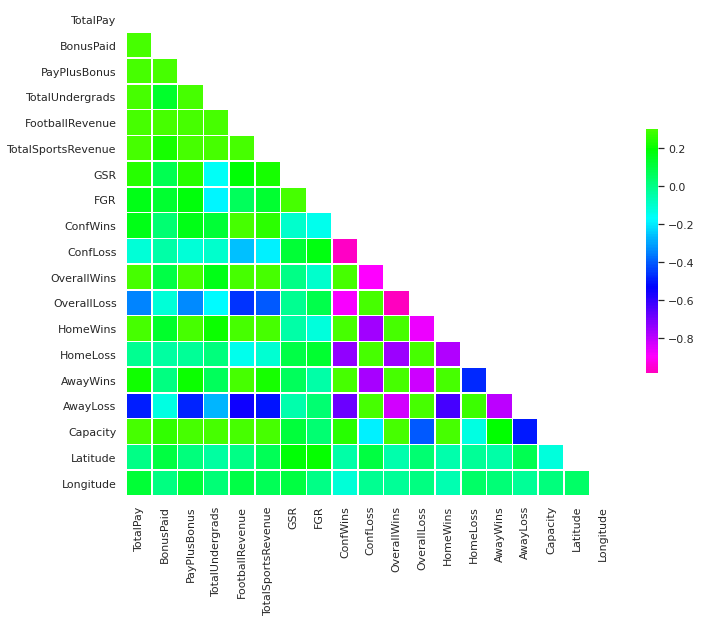

In [208]:
sns.set(style='white')

#set the dataframe to a computation with a correlation matrx
corr = workingDF2.corr()
#mask the upper triangle of the matrix for visual effect.
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate a custom colormap
#cmap = plt.pcolormesh( cmap='bone')
#sns.choose_diverging_palette(220, 10, as_cmap='bone')

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='gist_rainbow_r', 
            vmax=.3, center=0, 
            square=True, linewidths=.5, cbar_kws={'shrink': .5})


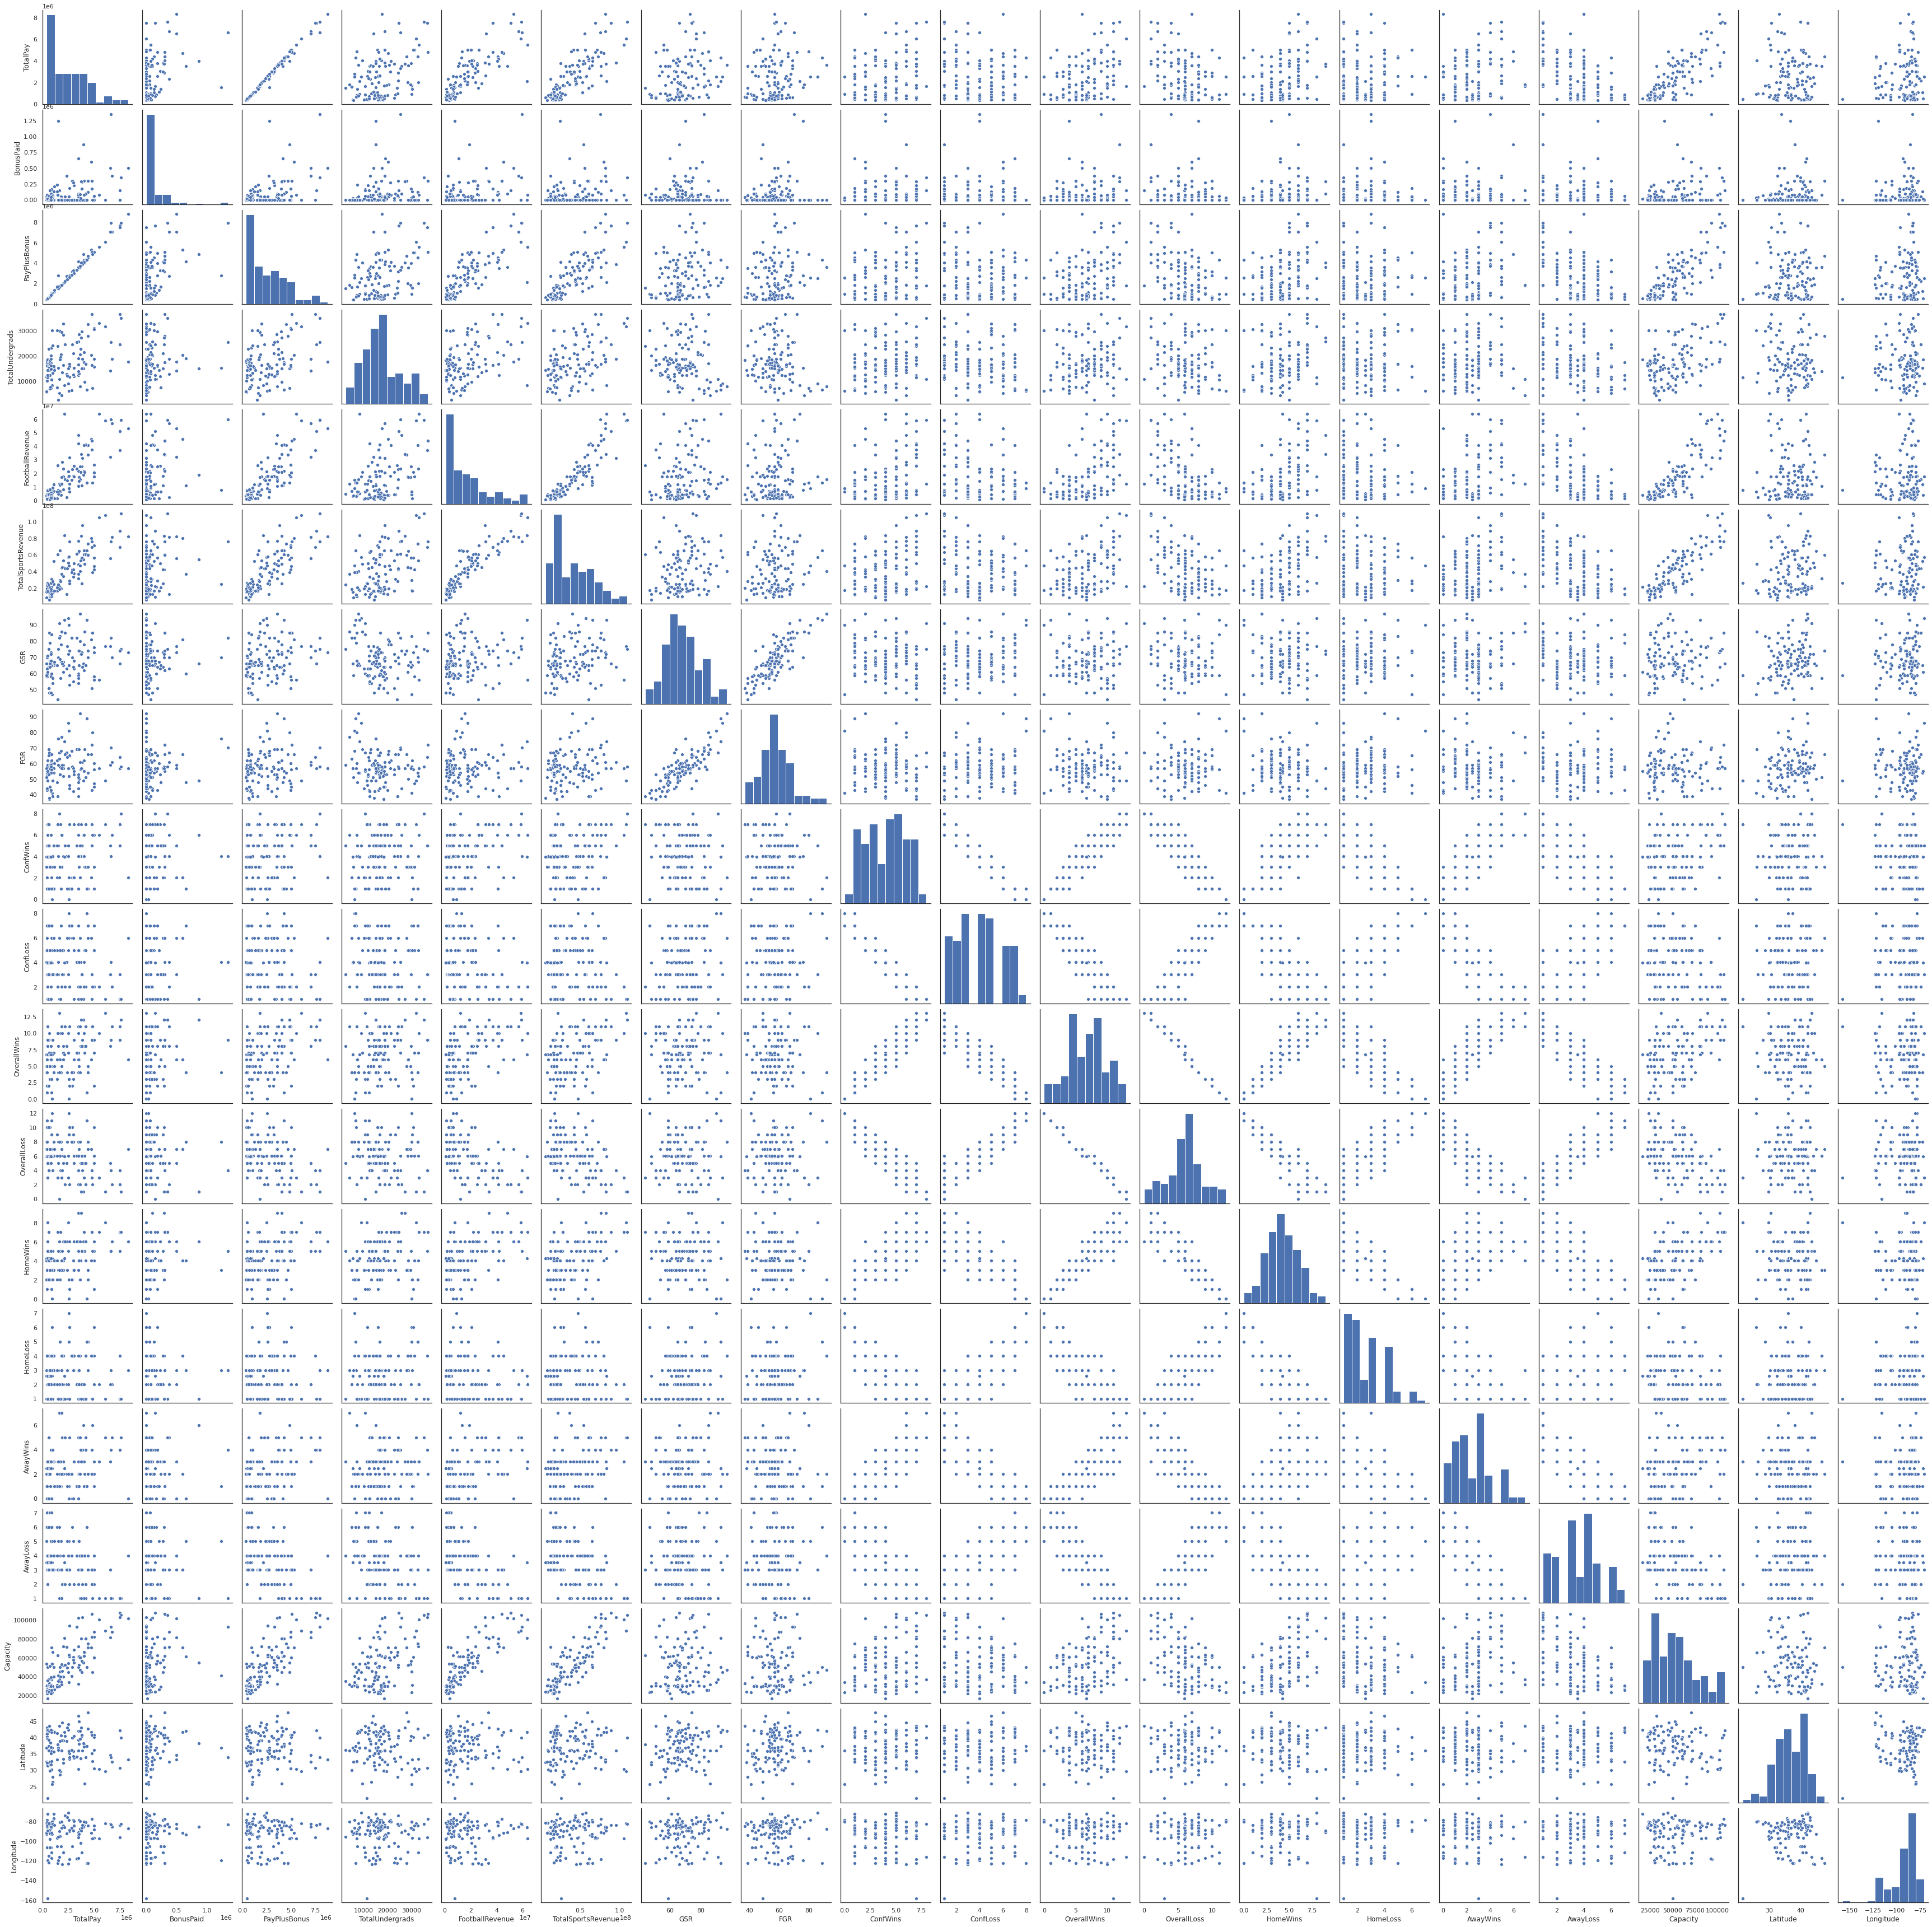

In [209]:
sns.pairplot(workingDF2)

# Transform the salary to reflect in thousands


In [210]:
workingDF2.loc[workingDF2['SchoolNameFinal'] == 'Syracuse']

#notice the form of 'total pay' 

,SchoolNameFinal,Coach,Conference,Historic_Conference,Stadium,Division,TotalPay,BonusPaid,PayPlusBonus,TotalUndergrads,FootballRevenue,TotalSportsRevenue,GSR,FGR,ConfWins,ConfLoss,OverallWins,OverallLoss,HomeWins,HomeLoss,AwayWins,AwayLoss,Capacity,Latitude,Longitude
99,Syracuse,Dino Babers,ACC,Big East,Carrier Dome,Big East Conference football season,2401206,0,2401206,12144,14866061,43732382,77,64,1,6,4,8,3,3,1,5,49250,43,-76


In [211]:
workingDF3 = workingDF2
workingDF3['TotalPayThousands']=workingDF3['TotalPay']/1000
#verify the transformation 
workingDF3.loc[workingDF3['SchoolNameFinal'] == 'Syracuse']

#notice the form of 'total pay' 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,SchoolNameFinal,Coach,Conference,Historic_Conference,Stadium,Division,TotalPay,BonusPaid,PayPlusBonus,TotalUndergrads,FootballRevenue,TotalSportsRevenue,GSR,FGR,ConfWins,ConfLoss,OverallWins,OverallLoss,HomeWins,HomeLoss,AwayWins,AwayLoss,Capacity,Latitude,Longitude,TotalPayThousands
99,Syracuse,Dino Babers,ACC,Big East,Carrier Dome,Big East Conference football season,2401206,0,2401206,12144,14866061,43732382,77,64,1,6,4,8,3,3,1,5,49250,43,-76,2401


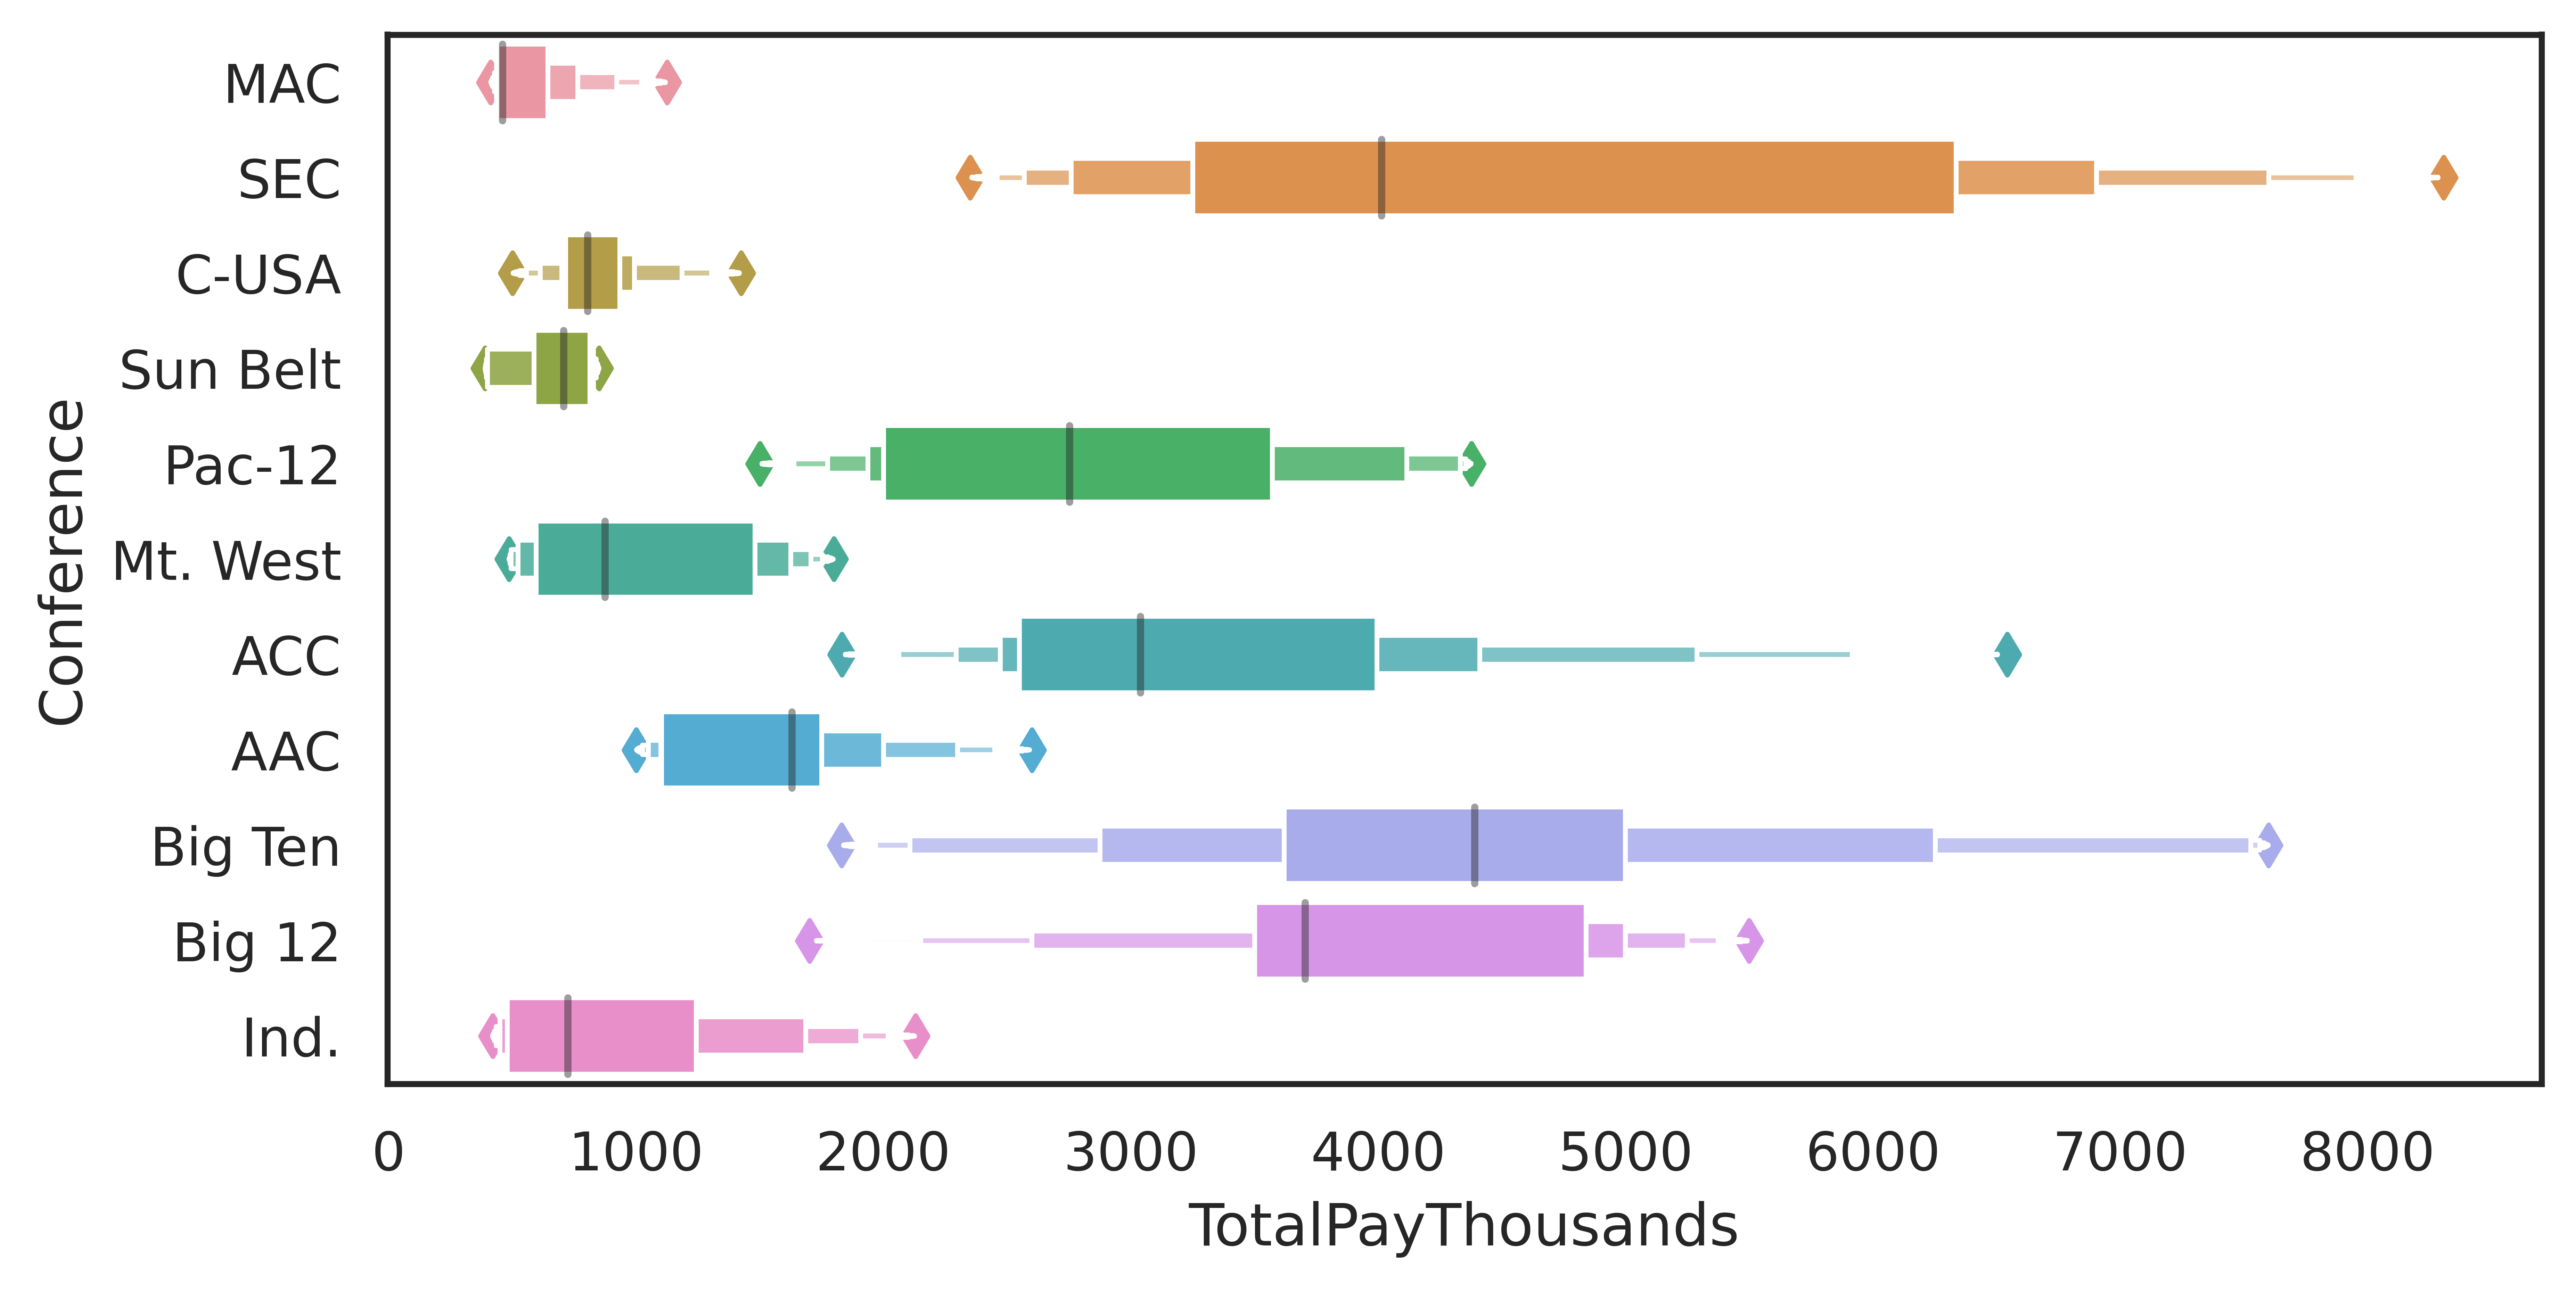

In [212]:
#visualize the data 
plt.figure(figsize=(8,4), dpi=1000)
sns.boxenplot(x='TotalPayThousands', y='Conference', hue=None, data=workingDF3)

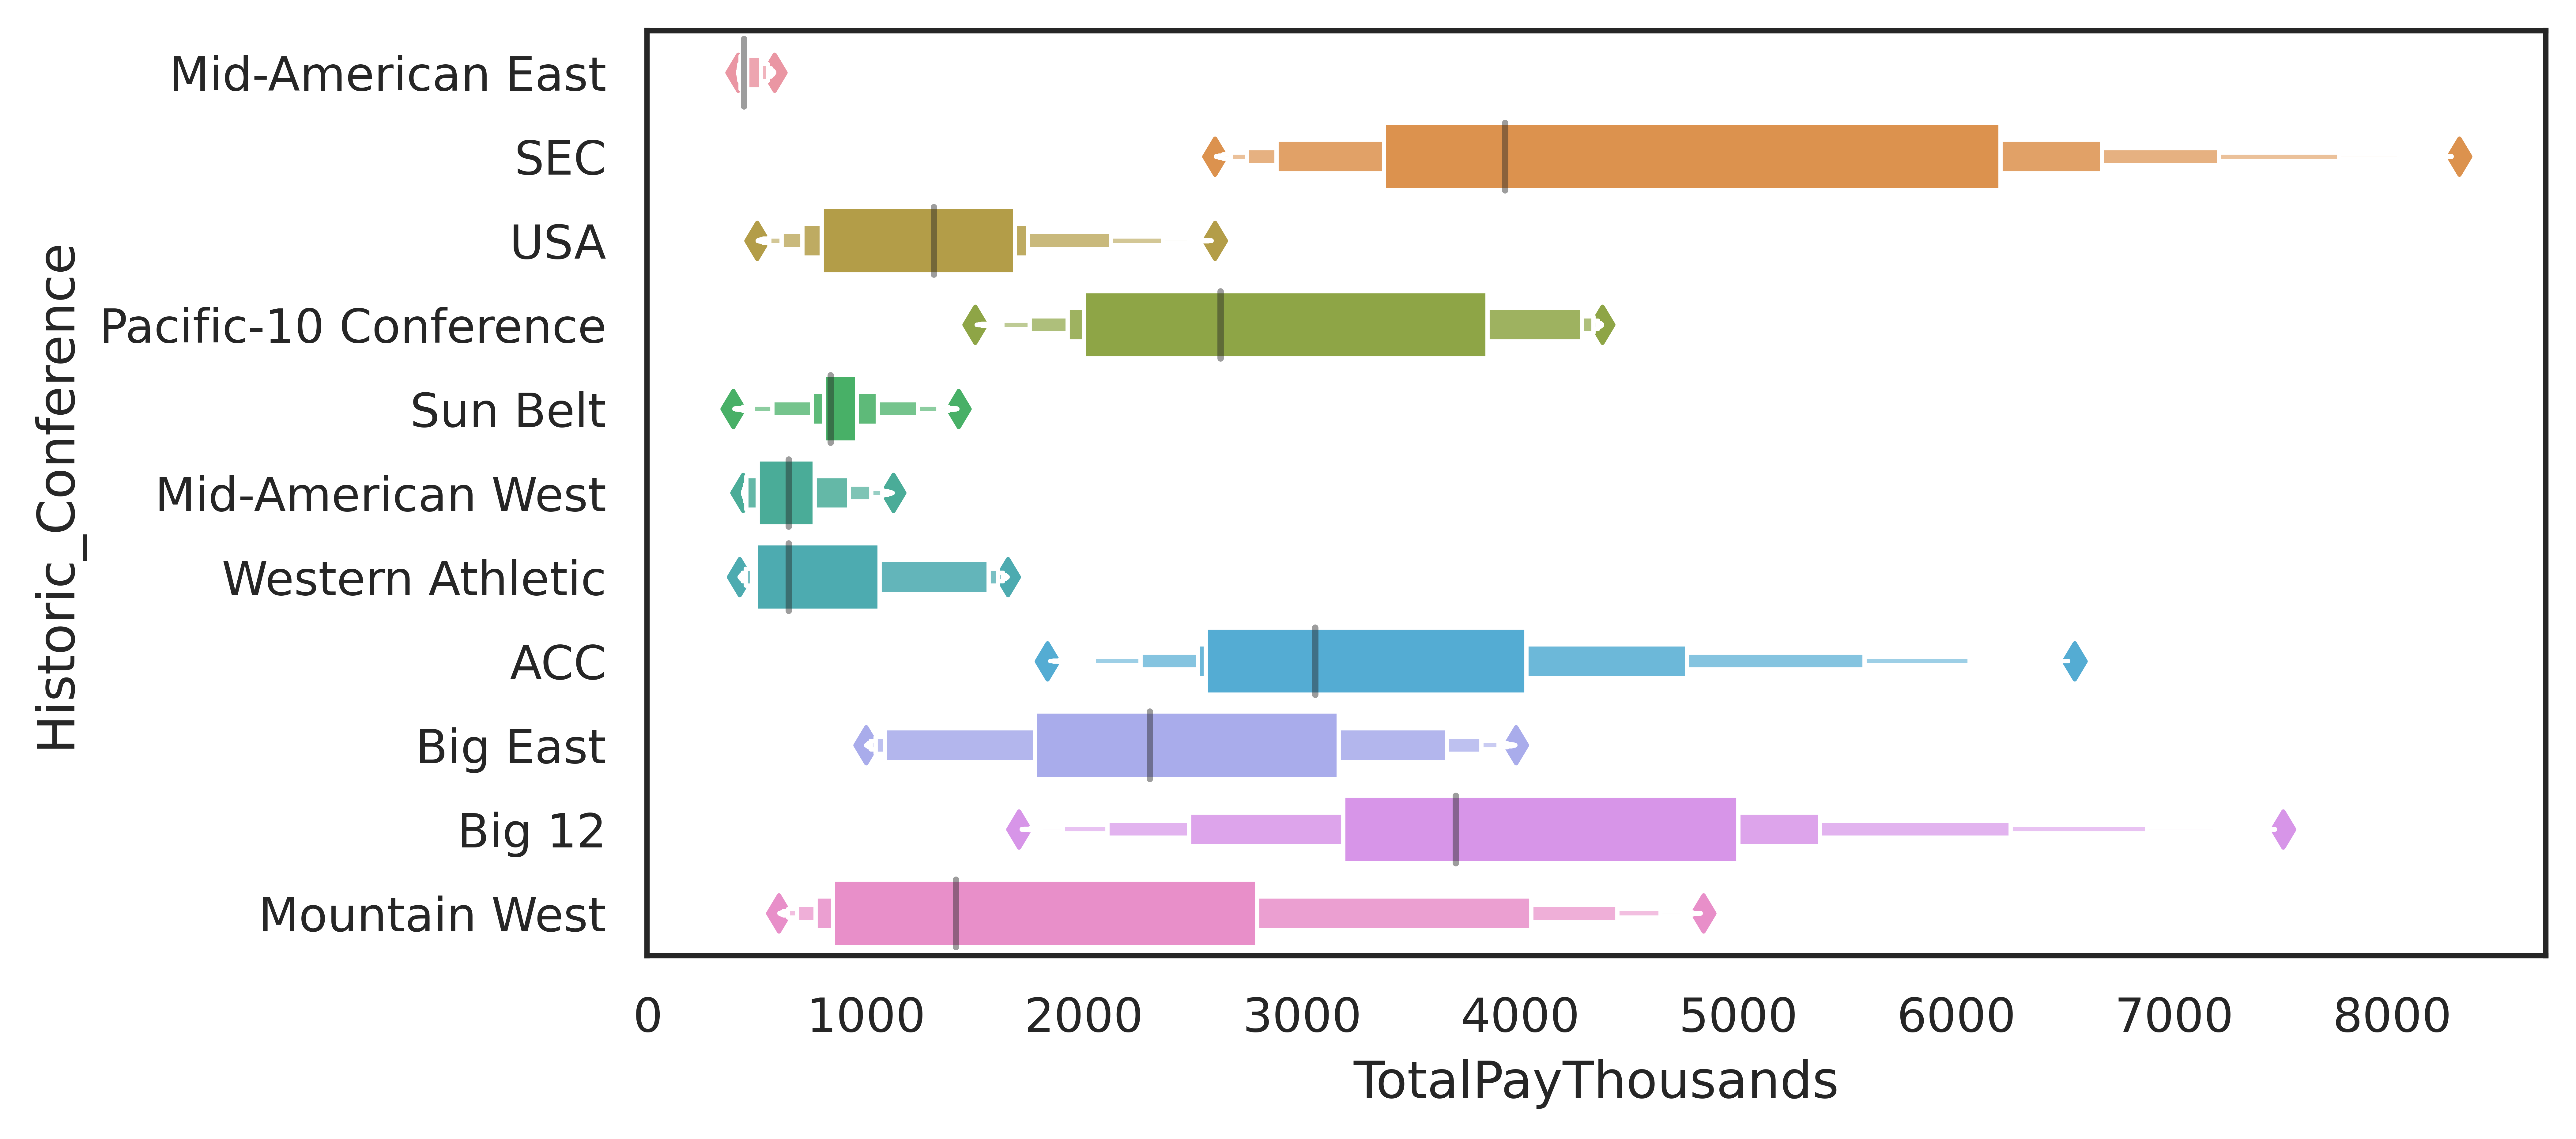

In [213]:
plt.figure(figsize=(8,4), dpi=1000)
sns.boxenplot(x='TotalPayThousands', y='Historic_Conference', hue=None, data=workingDF3)

<Figure size 8000x10000 with 0 Axes>

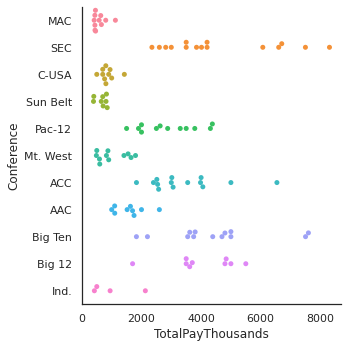

In [214]:
#Look at Salary by conference
plt.figure(figsize=(8,10), dpi=1000)
sns.catplot(y='Conference', x='TotalPayThousands', data=workingDF3, orient='h', kind='swarm');

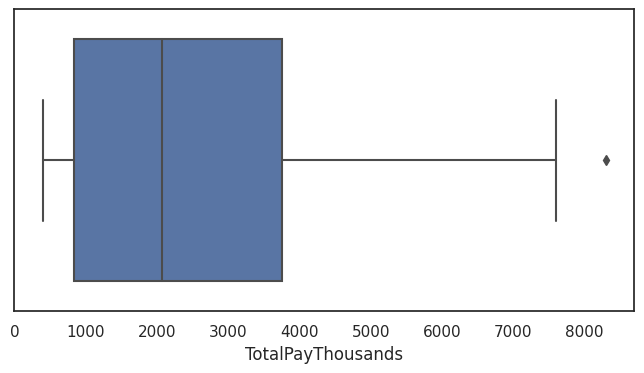

In [215]:
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(x='TotalPayThousands', hue=None, data=workingDF3)

In [216]:
workingDF2.describe()

,TotalPay,BonusPaid,PayPlusBonus,TotalUndergrads,FootballRevenue,TotalSportsRevenue,GSR,FGR,ConfWins,ConfLoss,OverallWins,OverallLoss,HomeWins,HomeLoss,AwayWins,AwayLoss,Capacity,Latitude,Longitude,TotalPayThousands
count,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116
mean,2549712,113517,2663229,17578,17435158,41336084,69,57,4,4,7,6,4,3,2,4,53329,37,-93,2550
std,1909052,217457,1999635,7723,16341989,24770574,11,10,2,2,3,3,2,1,2,2,23367,5,15,1909
min,390000,0,390000,2712,639253,6519930,44,37,0,1,0,0,0,1,0,1,17000,21,-158,390
25%,824685,0,865484,12433,4460574,19543705,61,52,3,3,4,4,3,1,1,3,31375,33,-97,825
50%,2064819,37125,2189819,16536,12094808,37171105,67,57,4,4,7,6,4,2,2,4,50127,37,-89,2065
75%,3759479,126000,3995000,21788,23938230,59871020,75,62,5,5,9,8,6,3,3,4,66775,41,-82,3759
max,8307000,1350000,8807000,36612,63798068,109382222,97,92,8,8,13,12,9,7,7,7,107601,48,-71,8307


 # Examination of salary by conferences and schools 
 
 conference = x-axis 
 salary     = y-axis 
 

In [217]:
#Big Ten Conference Variable married to the dataset for further demonstration.
bigTenconf = workingDF2[workingDF2.SchoolNameFinal.isin(b_10_conf)]
print(bigTenconf)
 



    SchoolNameFinal           Coach  ... Longitude TotalPayThousands
40         Illinois     Lovie Smith  ...       -88              5000
41          Indiana       Tom Allen  ...       -87              1830
42             Iowa    Kirk Ferentz  ...       -92              4700
60         Michigan    Jim Harbaugh  ...       -84              7504
61   Michigan State   Mark Dantonio  ...       -84              4390
63        Minnesota      P.J. Fleck  ...       -93              3550
68         Nebraska     Scott Frost  ...       -97              5000
77     Northwestern  Pat Fitzgerald  ...       -88              3620
80       Ohio State     Urban Meyer  ...       -83              7600
86       Penn State  James Franklin  ...       -78              4800
88           Purdue      Jeff Brohm  ...       -87              3800
89          Rutgers       Chris Ash  ...       -74              2200
99         Syracuse     Dino Babers  ...       -76              2401
124       Wisconsin     Paul Chrys

In [218]:
#ACC Conference Dataframe 

ACC_conf = workingDF2[workingDF2.Conference == 'ACC']
print(ACC_conf)

          SchoolNameFinal              Coach  ... Longitude TotalPayThousands
13         Boston College      Steve Addazio  ...       -71              2515
21                Clemson       Dabo Swinney  ...       -83              6543
26                   Duke    David Cutcliffe  ...       -79              2541
32          Florida State     Willie Taggart  ...       -84              5000
37           Georgia Tech       Paul Johnson  ...       -84              3060
52             Louisville      Bobby Petrino  ...       -86              3980
58                  Miami         Mark Richt  ...       -80              4058
73         North Carolina       Larry Fedora  ...       -79              2575
74   North Carolina State        Dave Doeren  ...       -79              3000
87             Pittsburgh       Pat Narduzzi  ...       -80              3018
99               Syracuse        Dino Babers  ...       -76              2401
116              Virginia  Bronco Mendenhall  ...       -79     

In [219]:
# Big East (old)
bigEastconf = workingDF2[workingDF2.SchoolNameFinal.isin(b_e_conf_2012)];
print(bigEastconf.SchoolNameFinal)

20       Cincinnati
25      Connecticut
52       Louisville
87       Pittsburgh
89          Rutgers
95    South Florida
99         Syracuse
Name: SchoolNameFinal, dtype: object


#Visualization of the by Conference Data 


#BIG TEN Schools Total Pay comparisons


Text(0.5, 1.0, 'Big Ten Conference, Schools Total Pay: Syracuase added for comparision')

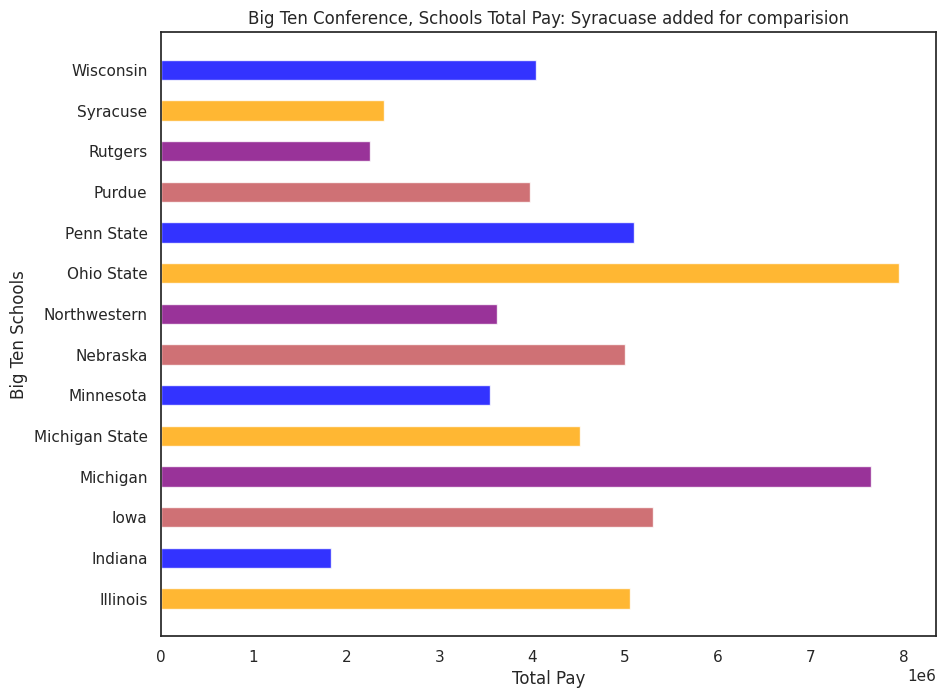

In [220]:
plt.figure(figsize=(10,8), dpi=100)
index = bigTenconf.SchoolNameFinal
pay = bigTenconf.PayPlusBonus
bar_width = 0.50
opacity = 0.8
plt.barh(index, pay,
         bar_width,
         alpha=opacity,
         color=('orange','blue','r','purple'))

plt.xlabel('Total Pay')
plt.ylabel('Big Ten Schools')
plt.title('Big Ten Conference, Schools Total Pay: Syracuase added for comparision')
    


# ACC Conference Schools total pay comparison 


Text(0.5, 1.0, 'ACC Conference, Schools TotalPay')

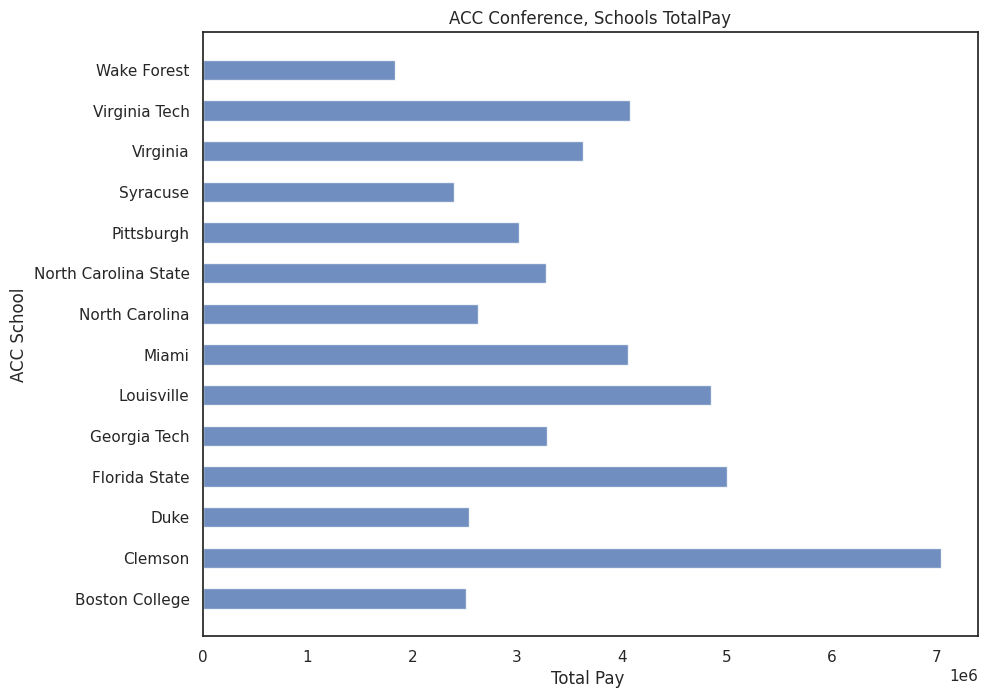

In [221]:
plt.figure(figsize=(10, 8), dpi=100)
index = ACC_conf.SchoolNameFinal
pay = ACC_conf.PayPlusBonus
bar_width = 0.50
opacity = 0.8
plt.barh(index, pay,
          bar_width, 
          alpha = opacity,
          color='b')
plt.xlabel('Total Pay ')
plt.ylabel('ACC School')
plt.title('ACC Conference, Schools TotalPay' )

# BIG EAST (2012) Schools Tota Pay Comparison


Text(0.5, 1.0, 'DEFUNCT BIG EAST Conference, Schools TotalPay Summer 2020 RST')

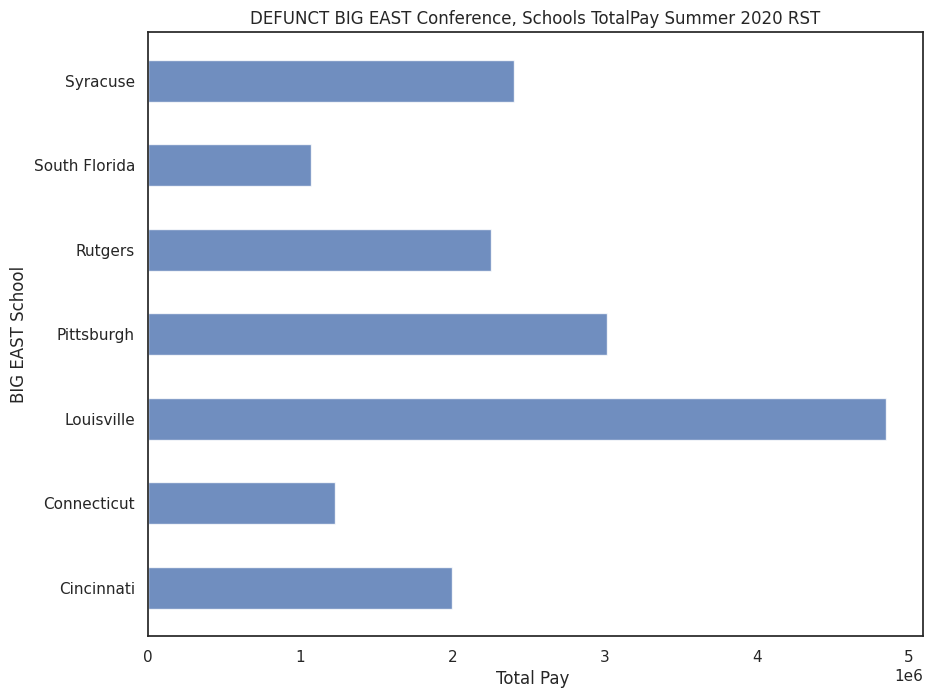

In [222]:
#bigEastconf
plt.figure(figsize=(10, 8), dpi=100)
index = bigEastconf.SchoolNameFinal
pay = bigEastconf.PayPlusBonus
bar_width = 0.50
opacity = 0.8
plt.barh(index, pay,
          bar_width, 
          alpha = opacity,
          color='b')
plt.xlabel('Total Pay ')
plt.ylabel('BIG EAST School')
plt.title('DEFUNCT BIG EAST Conference, Schools TotalPay Summer 2020 RST' 
          )

In [223]:
bigTenconf

,SchoolNameFinal,Coach,Conference,Historic_Conference,Stadium,Division,TotalPay,BonusPaid,PayPlusBonus,TotalUndergrads,FootballRevenue,TotalSportsRevenue,GSR,FGR,ConfWins,ConfLoss,OverallWins,OverallLoss,HomeWins,HomeLoss,AwayWins,AwayLoss,Capacity,Latitude,Longitude,TotalPayThousands
40,Illinois,Lovie Smith,Big Ten,NaN,Memorial Stadium,Big 10 Conference,5000000,50000,5050000,30575,20764472,56804174,73,56,1,7,2,10,1,6,1,4,60670,40,-88,5000
41,Indiana,Tom Allen,Big Ten,NaN,Memorial Stadium,Big 10 Conference,1830000,0,1830000,29549,17033871,44739096,67,57,3,5,5,7,3,4,2,3,52959,39,-87,1830
42,Iowa,Kirk Ferentz,Big Ten,NaN,Kinnick Stadium,Big 10 Conference,4700000,600000,5300000,20300,45335026,80203645,81,66,2,6,6,7,4,4,2,3,70585,42,-92,4700
60,Michigan,Jim Harbaugh,Big Ten,NaN,Michigan Stadium,Big 10 Conference,7504000,150000,7654000,24631,50982629,89079982,66,57,7,1,11,2,7,1,4,1,107601,42,-84,7504
61,Michigan State,Mark Dantonio,Big Ten,NaN,Spartan Stadium,Big 10 Conference,4390417,125000,4515417,32588,40795755,73171907,70,54,1,7,4,8,2,5,2,3,75005,43,-84,4390
63,Minnesota,P.J. Fleck,Big Ten,NaN,TCF Bank Stadium,Big 10 Conference,3550000,0,3550000,28516,17390376,64828596,65,50,3,5,6,7,4,3,2,4,52525,45,-93,3550
68,Nebraska,Scott Frost,Big Ten,Big 12,Memorial Stadium,Big 12 Northern Division,5000000,0,5000000,15768,26264849,71121812,76,60,6,2,9,5,6,2,3,3,87091,41,-97,5000
77,Northwestern,Pat Fitzgerald,Big Ten,NaN,Ryan Field,Big 10 Conference,3619775,0,3619775,7976,15513675,40757282,97,92,2,6,4,8,2,4,2,4,47130,42,-88,3620
80,Ohio State,Urban Meyer,Big Ten,NaN,Ohio Stadium,Big 10 Conference,7600000,350000,7950000,34982,59142071,109382222,75,58,8,1,12,1,7,1,5,1,104944,40,-83,7600
86,Penn State,James Franklin,Big Ten,NaN,Beaver Stadium,Big 10 Conference,4800000,300000,5100000,36612,44014052,76327504,85,72,5,3,9,4,7,1,2,3,106572,41,-78,4800


In [224]:
import sys
sys.setrecursionlimit(3000) # this number can be any limit

In [225]:

#Big Ten Conference Interactive Map  bigTenconf
# convert dataframe to geojson and save to js file
bigTenconf_gdf= GeoDataFrame(bigTenconf)
bigTenconf_gdf['geometry'] = bigTenconf.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
cols = ['SchoolNameFinal', 'Coach', 'Conference', 'Stadium', 'PayPlusBonus',
        'TotalSportsRevenue', 'Latitude','Longitude','TotalPayThousands']
#lang_gdf = lang_gdf.drop(cols, axis=1, inplace=False)
#geojson = bigTenconf.to_json()
#output_filename = 'leaflet_bigTenconf_gdf.js'
#with open(output_filename, 'w') as output_file:
 #   output_file.write('var dataset = {};'.format(geojson, separators=(',',':')))




In [226]:
countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
m_1 = Map(center=(52.3,8.0), zoom = 3, basemap= basemaps.Esri.WorldTopoMap)
geo_data = GeoData(geo_dataframe = bigTenconf_gdf,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'countries')
m_1.add_control(geo_data)
m_1.add_control(LayersControl())
m_1

Map(center=[52.3, 8.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…

In [227]:
type(m_1)

ipyleaflet.leaflet.Map

# Modeling 
# Section I
> Mulitple Linear Regression Models
>>
>>
#Section II 
> Kmeans clustering 
>>
>>
